In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("20240224.csv",encoding= 'unicode_escape',  index_col=0)

#View the original shape and check for missing values
print("Original data shape (rows, columns):")
print(df.shape)
df.info()

print("\nMissing values in each column:")
print(df.isnull().sum())

print(df.head())


Original data shape (rows, columns):
(397, 41)
<class 'pandas.core.frame.DataFrame'>
Index: 397 entries, nan to nan
Data columns (total 41 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ProductAlternateKey                  397 non-null    object 
 1   OLE DB Source ProductSubcategoryKey  0 non-null      float64
 2   WeightUnitMeasureCode                275 non-null    object 
 3   SizeUnitMeasureCode                  253 non-null    object 
 4   EnglishProductName                   397 non-null    object 
 5   SpanishProductName                   319 non-null    object 
 6   FrenchProductName                    319 non-null    object 
 7   StandardCost                         395 non-null    object 
 8   FinishedGoodsFlag                    397 non-null    bool   
 9   Color                                341 non-null    object 
 10  SafetyStockLevel                     397 non-null    i

In [70]:
# -------------------------------
# Step 2: Remove cols/rows with missing data
# -------------------------------

# Drop fully empty columns
df_no_missing = df.copy()
df_no_missing = df_no_missing.dropna(axis=1, how='all')


print("\nData shape after dropping rows with missing values:")
print(df_no_missing.shape)
print("Missing values after dropping:")
print(df_no_missing.isnull().sum())



Data shape after dropping rows with missing values:
(397, 36)
Missing values after dropping:
ProductAlternateKey                0
WeightUnitMeasureCode            122
SizeUnitMeasureCode              144
EnglishProductName                 0
SpanishProductName                78
FrenchProductName                 78
StandardCost                       2
FinishedGoodsFlag                  0
Color                             56
SafetyStockLevel                   0
ReorderPoint                       0
ListPrice                          2
Size                              98
SizeRange                         98
Weight                           122
DaysToManufacture                  0
ProductLine                       17
DealerPrice                        2
Class                             85
Style                             96
ModelName                          0
EnglishDescription                 1
FrenchDescription                  1
ChineseDescription                 1
ArabicDescription 

In [82]:
# -------------------------------
# Step 3: Convert data types
# -------------------------------
df_converted_types = df_no_missing.copy()
df_converted_types.info()

# Convert numeric columns from string to float
num_cols = ['StandardCost', 'ListPrice', 'Weight', 'DealerPrice']
for col in num_cols:
    df_converted_types[col] = df_converted_types[col].str.replace(",", ".", regex=False).astype(float).round(2)

# Convert date columns
df_converted_types['StartDate'] = pd.to_datetime(df_converted_types['StartDate'], errors='coerce')
df_converted_types['EndDate'] = pd.to_datetime(df_converted_types['EndDate'], errors='coerce')

# Clean string columns and convert to category
cat_cols = ['WeightUnitMeasureCode', 'SizeUnitMeasureCode', 'Color', 'ProductLine', 'Class', 'Style', 'Status']
for col in cat_cols:
    df_converted_types[col] = df_converted_types[col].astype(str).str.strip().astype('category')

print("\nData types after conversion:")
print(df_converted_types.dtypes)


<class 'pandas.core.frame.DataFrame'>
Index: 397 entries, nan to nan
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   ProductAlternateKey            397 non-null    object
 1   WeightUnitMeasureCode          275 non-null    object
 2   SizeUnitMeasureCode            253 non-null    object
 3   EnglishProductName             397 non-null    object
 4   SpanishProductName             319 non-null    object
 5   FrenchProductName              319 non-null    object
 6   StandardCost                   395 non-null    object
 7   FinishedGoodsFlag              397 non-null    bool  
 8   Color                          341 non-null    object
 9   SafetyStockLevel               397 non-null    int64 
 10  ReorderPoint                   397 non-null    int64 
 11  ListPrice                      395 non-null    object
 12  Size                           299 non-null    object
 13  SizeRang

In [86]:
# -------------------------------
# Step 4: Fill missing values
# -------------------------------
df_missing_values = df_converted_types.copy()

# Fill category missing values with default values
cat_fill = {
    'WeightUnitMeasureCode': 'NA',
    'SizeUnitMeasureCode': 'NA',
    'Color': 'No Color',
    'Class': 'NA',
    'Style': 'NA',
    'Status': 'Unknown'
}
for col, default in cat_fill.items():
    df_missing_values[col] = df_missing_values[col].cat.add_categories([default])
    df_missing_values[col] = df_missing_values[col].fillna(default)

# Fill language-specific names from English version
df_missing_values['SpanishProductName'] = df_missing_values['SpanishProductName'].fillna(df['EnglishProductName'])
df_missing_values['FrenchProductName'] = df_missing_values['FrenchProductName'].fillna(df['EnglishProductName'])

# Fill missing descriptions with placeholder
desc_cols = [col for col in df_missing_values.columns if 'Description' in col]
for col in desc_cols:
    df_missing_values[col] = df_missing_values[col].fillna('No description')

# Fill numeric columns with their mean
for col in ['StandardCost', 'ListPrice', 'Weight', 'DealerPrice']:
    df_missing_values[col] = df_missing_values[col].fillna(df_missing_values[col].mean())

# Fill string fields with sensible defaults
df_missing_values['Size'] = df_missing_values['Size'].fillna('NA')
df_missing_values['SizeRange'] = df_missing_values['SizeRange'].fillna('NA')
df_missing_values['ProductLine'] = df_missing_values['ProductLine'].fillna(df_missing_values['ProductLine'].mode()[0])
df_missing_values['EndDate'] = df_missing_values['EndDate'].fillna(pd.to_datetime('2099-12-31'))


print("\nMissing values after filling:")
print(df_missing_values.info())
print(df_missing_values.isnull().sum())



Missing values after filling:
<class 'pandas.core.frame.DataFrame'>
Index: 397 entries, nan to nan
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ProductAlternateKey            397 non-null    object        
 1   WeightUnitMeasureCode          397 non-null    category      
 2   SizeUnitMeasureCode            397 non-null    category      
 3   EnglishProductName             397 non-null    object        
 4   SpanishProductName             397 non-null    object        
 5   FrenchProductName              397 non-null    object        
 6   StandardCost                   397 non-null    float64       
 7   FinishedGoodsFlag              397 non-null    bool          
 8   Color                          397 non-null    category      
 9   SafetyStockLevel               397 non-null    int64         
 10  ReorderPoint                   397 non-null    int64      

In [73]:

# -------------------------------
# Step 5: Remove duplicate rows
# -------------------------------
df_no_duplicates = df_missing_values.copy()

# Drop duplicate rows
df_no_duplicates = df_no_duplicates.drop_duplicates()

print("\nShape after removing duplicate rows:")
print(df_no_duplicates.shape)
print(df_no_duplicates.info())




Shape after removing duplicate rows:
(397, 36)
<class 'pandas.core.frame.DataFrame'>
Index: 397 entries, nan to nan
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ProductAlternateKey            397 non-null    object        
 1   WeightUnitMeasureCode          397 non-null    category      
 2   SizeUnitMeasureCode            397 non-null    category      
 3   EnglishProductName             397 non-null    object        
 4   SpanishProductName             397 non-null    object        
 5   FrenchProductName              397 non-null    object        
 6   StandardCost                   397 non-null    float64       
 7   FinishedGoodsFlag              397 non-null    bool          
 8   Color                          397 non-null    category      
 9   SafetyStockLevel               397 non-null    int64         
 10  ReorderPoint                   397 non-nu

In [88]:
# -------------------------------
# Step 6: Add derived metric
# -------------------------------
df_no_duplicates['ProfitMargin'] = df_no_duplicates['DealerPrice'] - df_no_duplicates['StandardCost']
print(df_no_duplicates['ProfitMargin'])

ProductKey
NaN    14.329671
NaN    14.329671
NaN     8.160000
NaN     6.310000
NaN     7.900000
         ...    
NaN    15.790000
NaN    18.950000
NaN   -19.660000
NaN   -19.660000
NaN   -19.660000
Name: ProfitMargin, Length: 397, dtype: float64


In [74]:
# -------------------------------
# Step 7: Write To Csv-file
# -------------------------------
df_no_duplicates.to_csv('clean_data.csv', index=False)


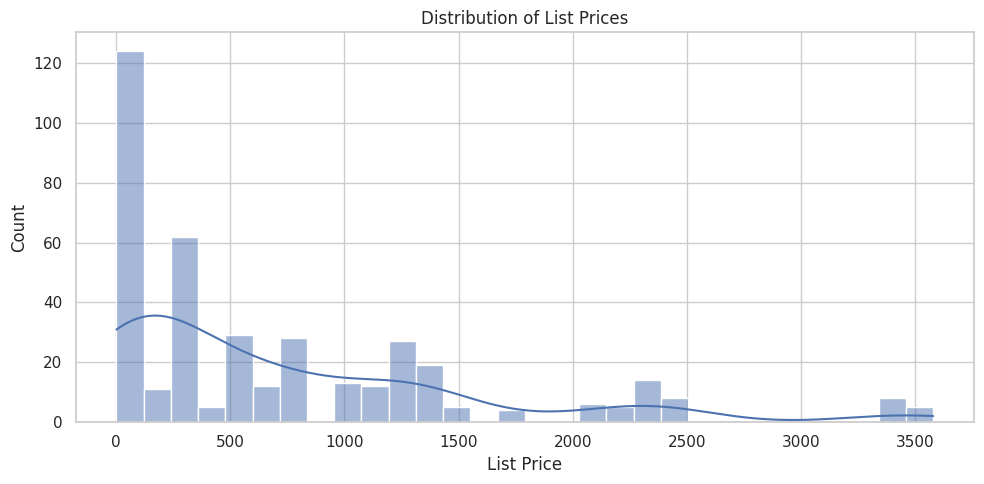

In [91]:
# -------------------------------
# Step 7: Visualizing the results
# -------------------------------

sns.set(style="whitegrid")
plt.rcParams.update({'figure.autolayout': True})  # auto layout fix

# 1. Histogram with KDE for List Price
plt.figure(figsize=(10, 5))
sns.histplot(df_no_duplicates['ListPrice'], bins=30, kde=True)
plt.title('Distribution of List Prices')
plt.xlabel('List Price')
plt.ylabel('Count')
plt.grid(True)
plt.show()


**🧠 What the plot shows:**
A histogram visualizing how product ListPrice values are distributed across the dataset.

A KDE (Kernel Density Estimate) curve is overlaid to show the probability density — i.e., where prices are most concentrated.

🔍** Key Observations:**
1. Right-skewed distribution:

- Most products have list prices clustered between 0 and 1,000.
- A long right tail suggests a smaller number of very high-priced products.

2. Outliers:

- A few products far to the right may represent premium or specialized items.
- Worth reviewing if they align with pricing strategy and customer demand.

**💡 Insights & Recommendations:**
- Consider binning prices into categories (e.g., budget, mid-range, premium) for further analysis.

- If outliers are confirmed to be niche products, ensure their marketing and positioning match their pricing.




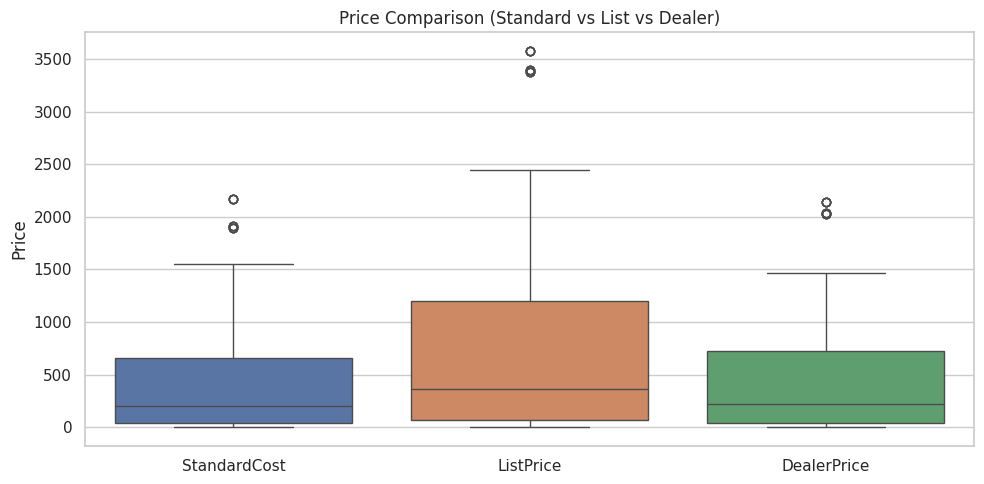

In [93]:
# 2. Boxplot: Price comparisons
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_no_duplicates[['StandardCost', 'ListPrice', 'DealerPrice']])
plt.title('Price Comparison (Standard vs List vs Dealer)')
plt.ylabel('Price')
plt.show()


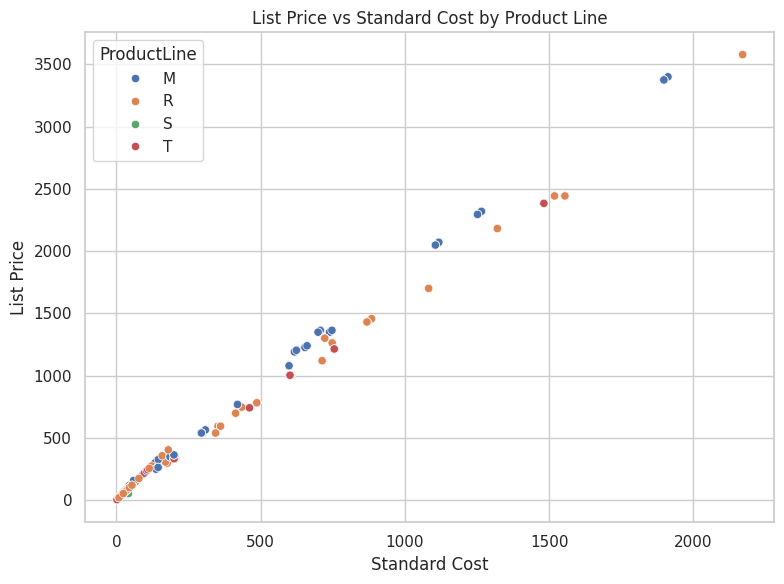

In [95]:
# 3. Scatter plot: List Price vs Standard Cost
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_no_duplicates, x='StandardCost', y='ListPrice', hue='ProductLine')
plt.title('List Price vs Standard Cost by Product Line')
plt.xlabel('Standard Cost')
plt.ylabel('List Price')
plt.show()


Here is the analysis of the scatter plot titled "List Price vs Standard Cost by Product Line":


**🧠 What this graph shows:**
  - X-axis: Standard Cost (how much the product costs to produce)
  - Y-axis: List Price (how much the product is listed for sale)
  - Colors: Different ProductLine categories (M, R, S, T)
  - Each dot represents a product.


** 📊 Observations:**

1. Strong Positive Correlation
Across all product lines, as Standard Cost increases, List Price increases.
This shows consistent pricing strategy — higher-cost products are priced higher.

2. Product Line M (blue):
- Concentrated at mid-to-high cost range.
- Most dots lie above the line of equality, suggesting higher markups.
- Indicates premium pricing — M products are more expensive and possibly higher margin.

3. Product Line R (orange):
- Most frequent across the plot.
- Covers wide cost range — from very low-cost to high-cost products.
- Some high-cost products have relatively low markups, which may reduce profitability.


4. Product Line S (green):
- Very few data points (low representation).
- Lies in the low-cost, low-price region.
- Suggests these are budget/low-tier products with limited margin or volume-focused.

5. Product Line T (red):
- Also sparsely represented.
- Located in mid-cost range, but pricing is close to the standard cost.
- Suggests low profit margins, confirming the earlier boxplot insights.

**📌 Insights & Recommendations:**
- Line M follows a strong value-based pricing model — likely high-end.
- Line R is diverse, but worth reviewing high-cost, low-margin items.
- Lines S and T have fewer entries and possibly tighter margins — consider repositioning or bundling strategies.


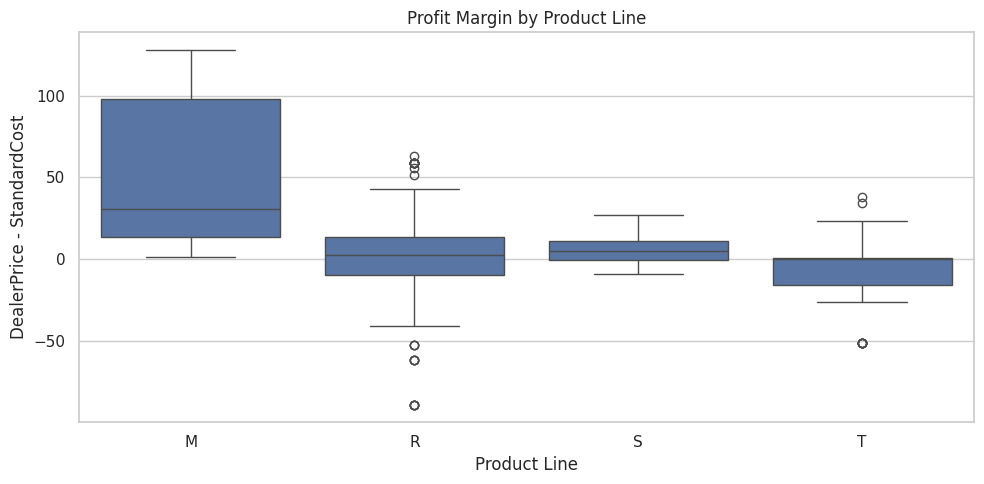

In [96]:

# 4. Boxplot: Profit Margin by Product Line
df_no_duplicates['ProfitMargin'] = df_no_duplicates['DealerPrice'] - df_no_duplicates['StandardCost']

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_no_duplicates, x='ProductLine', y='ProfitMargin')
plt.title('Profit Margin by Product Line')
plt.xlabel('Product Line')
plt.ylabel('DealerPrice - StandardCost')
plt.tight_layout()
plt.show()


Here is the analysis of your boxplot titled "Profit Margin by Product Line", where profit margin is calculated as:

> DealerPrice - StandardCost



1. **M**
  - Highest profit margin overall.
  - Median profit margin is significantly positive.


2. **R**
  - Median is close to zero — profits are low or neutral on average.
  - Many outliers below zero, indicating some products are sold at a loss.

3. **S**
  - Narrow box → low variability in profit margins.
  - Mostly positive profits, but small overall margins.

4. **T**
  - Median profit is negative, meaning the typical product in this line sells at a loss.
  - Many negative outliers, and only a few with any substantial margin.

This is a potentially problematic line, needing pricing or cost review.


📊 **General Insights:**
  - Line M stands out as the most profitable and variable.
  - Line T may be underpriced or expensive to produce — a candidate for financial optimization.
  - Lines R and S are marginally profitable or break-even but might still be strategic.

✅ **Recommendations**:
  - Audit Product Line T — why are most products losing money?
  - Consider promoting high-margin products from Line M.


/tmp/ipython-input-97-2252262877.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heat_data = df_no_duplicates.pivot_table(values='ListPrice', index='Class', columns='Style', aggfunc='mean')


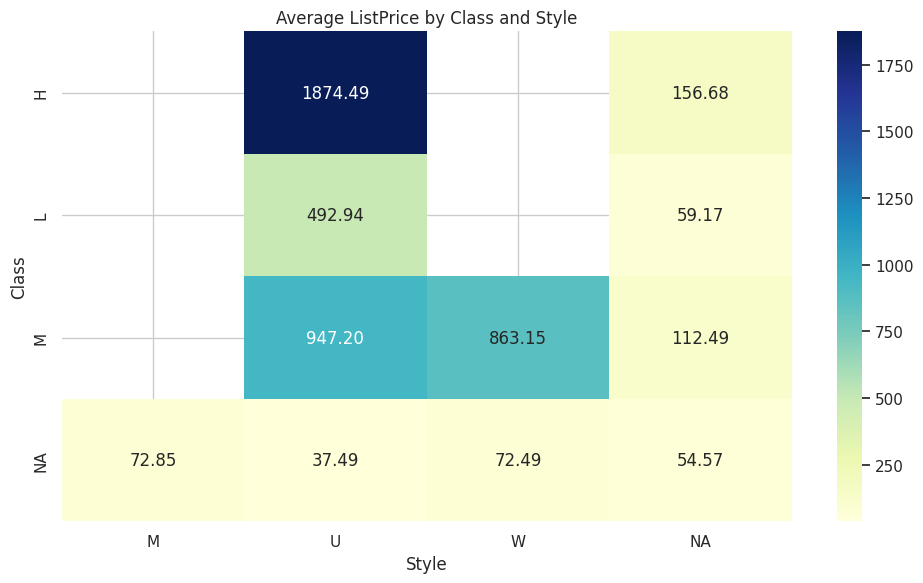

In [97]:
# 5. Heatmap: List Price by Class and Style
heat_data = df_no_duplicates.pivot_table(values='ListPrice', index='Class', columns='Style', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(heat_data, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Average ListPrice by Class and Style')
plt.xlabel('Style')
plt.ylabel('Class')
plt.tight_layout()
plt.show()


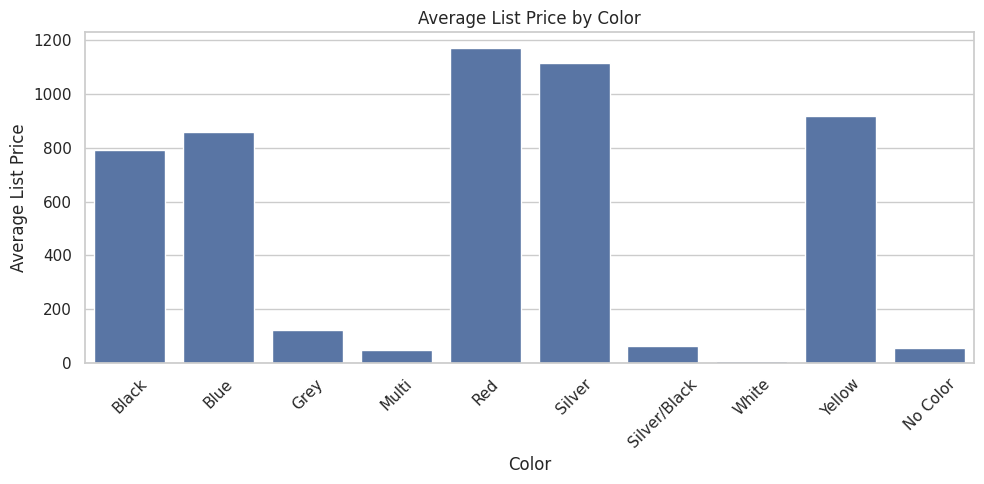

In [98]:
# 6. Barplot: Avg List Price by Color
plt.figure(figsize=(10, 5))
sns.barplot(data=df_no_duplicates, x='Color', y='ListPrice', estimator='mean', errorbar=None)
plt.title('Average List Price by Color')
plt.xlabel('Color')
plt.ylabel('Average List Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

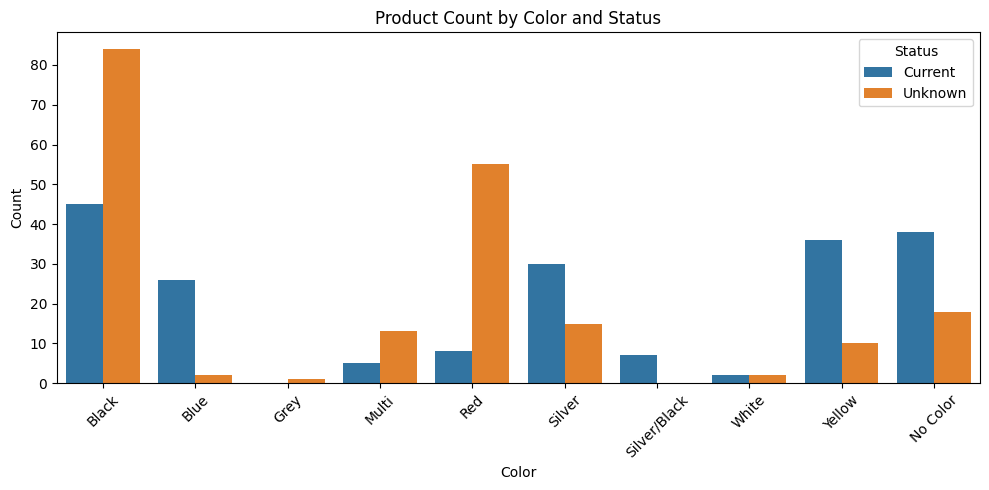

In [39]:
# 7. Countplot: Color vs Status
plt.figure(figsize=(10, 5))
sns.countplot(data=df_no_duplicates, x='Color', hue='Status')
plt.title('Product Count by Color and Status')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.tight_layout()
plt.show()

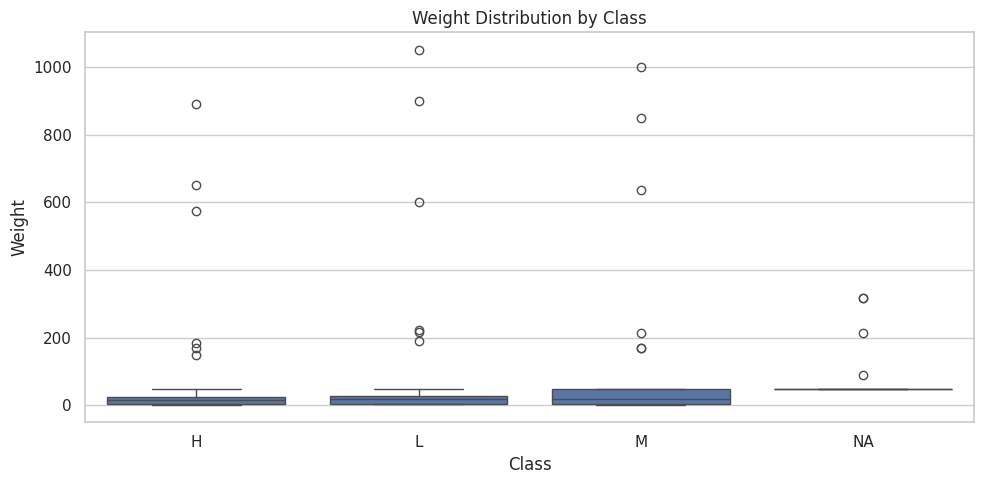

In [99]:
# 8. Boxplot: Weight by Class
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_no_duplicates, x='Class', y='Weight')
plt.title('Weight Distribution by Class')
plt.xlabel('Class')
plt.ylabel('Weight')
plt.tight_layout()
plt.show()


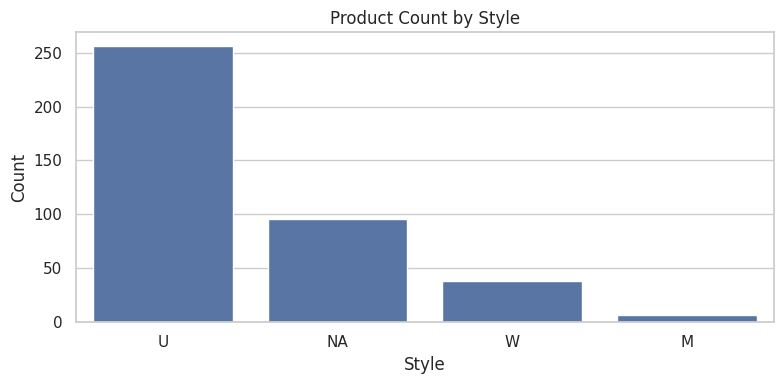

In [100]:
# 9. Countplot: Product count by Style
plt.figure(figsize=(8, 4))
sns.countplot(data=df_no_duplicates, x='Style', order=df_no_duplicates['Style'].value_counts().index)
plt.title('Product Count by Style')
plt.xlabel('Style')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


/tmp/ipython-input-101-2520073007.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heat_data = df_no_duplicates.pivot_table(index='Class', columns='Size', aggfunc='size', fill_value=0)


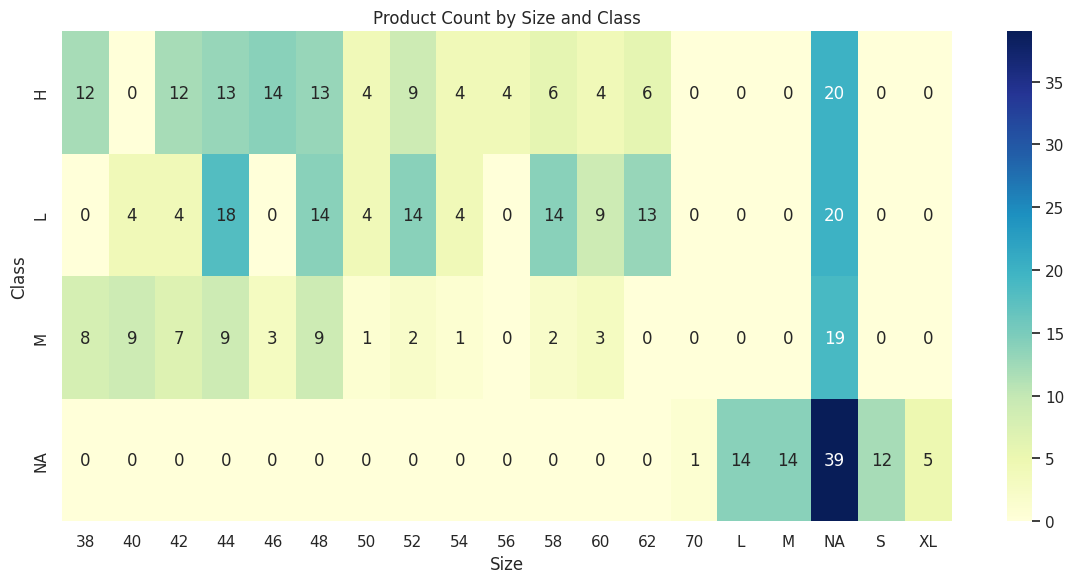

In [101]:
# 10. Heatmap: Product count by Size and Class
heat_data = df_no_duplicates.pivot_table(index='Class', columns='Size', aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(heat_data, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Product Count by Size and Class')
plt.xlabel('Size')
plt.ylabel('Class')
plt.tight_layout()
plt.show()
